In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df =pd.read_csv(r"C:\Users\Abdur rahim nishad\Downloads\train.csv~\train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.shape

(404290, 6)

In [6]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [9]:
(df.is_duplicate.value_counts()/df.is_duplicate.count())*100

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64

In [10]:
df.is_duplicate.count()

404290

<AxesSubplot:ylabel='Frequency'>

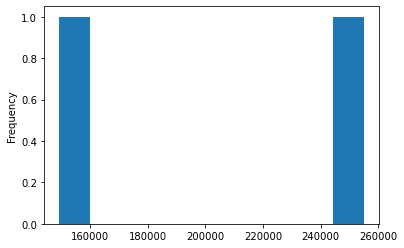

In [11]:
df.is_duplicate.value_counts().plot(kind="hist")

In [12]:
#repeated question
qid=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("Number of unique question" ,np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of repeated question" ,x[x].shape[0])

Number of unique question 537933
Number of repeated question 111780


In [13]:
qid=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("Number of unique question" ,np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number  of question getting repeated",x[x].shape[0])

Number of unique question 537933
Number  of question getting repeated 111780


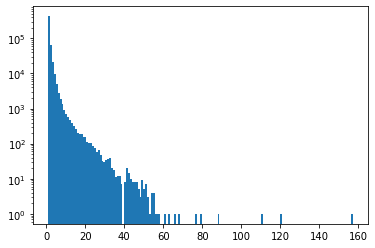

In [14]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [15]:
new_df=df.sample(30000)

In [16]:
new_df.shape

(30000, 6)

In [17]:
new_df.duplicated().sum()

0

In [18]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [19]:
ques_df=new_df[["question1","question2"]]

In [20]:
ques_df

,question1,question2
162955,What are some good pubs in chennai to hangout ...,What are some of the best pubs in Chennai to t...
140257,"What is the ""Monty Pythonesque application of ...",Is philosophy logical?
166410,What is the scope of the career in microstrategy?,What is the scope of the career in MicroStrate...
269460,What causes burning sensation while urinating?,Why do I feel a burning sensation after I pee?
102294,How to crack IIT JAM just by self study?,How can I crack IIT jam?
...,...,...
203100,What is the best source for news?,What is the best news source?
273803,If I can't monetize my website with adsense ho...,What is the best way to monetize your niche we...
141796,How do I get to Hollywood?,How can I get into Hollywood?
136305,Which residential or non-residential b-schools...,Do all B-schools in India have co-ed dorms lik...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions=list(ques_df["question1"])+list(ques_df["question2"])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)#mean for question1 30000 data for question2 30000 data

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)

In [ ]:
temp_df.shape

In [ ]:
temp_df.head()

In [ ]:
temp_df["is_duplicate"]=new_df["is_duplicate"]

In [ ]:
temp_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=.20,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [30]:
List = [1, 5, 2, 9, 3, 22, 13]
def List2(X):
    return list(set(X))
    
List2(List)

[1, 2, 3, 5, 9, 13, 22]